# Frozen Lake - 1 solution - classic array Q Learning
We will use an array that keeps track of the state and the action, this is a vital point that gives the agent the incentive to solve the problem and win the game. When everything starts we initialize the rewards for each action as zero. 

However recursively these values are changing until we found the optimal values for solving the problem
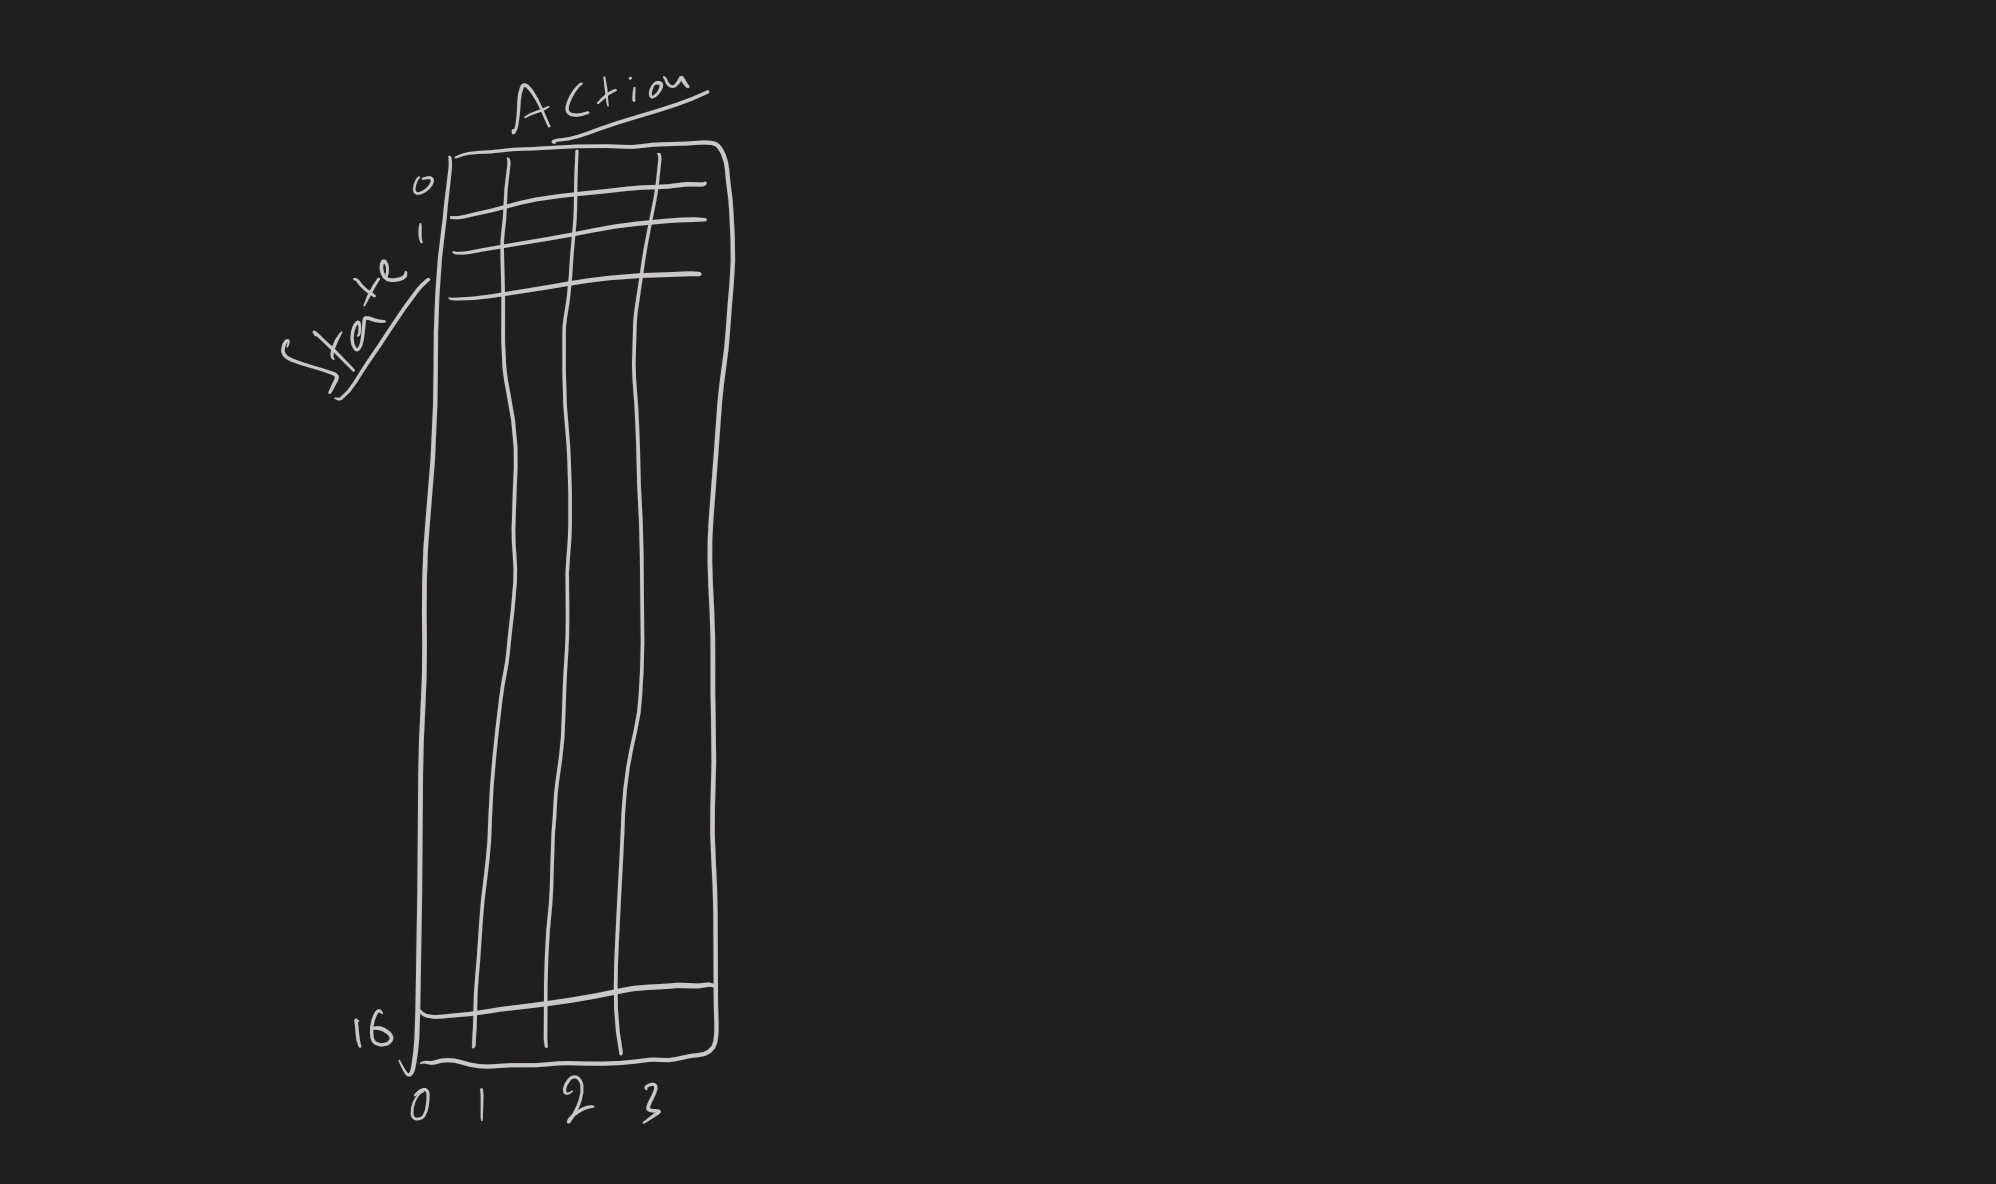


In [ ]:
import numpy as np
import gym
import random
import time
from IPython.display import clear_output

# Initialize Parameters

In [ ]:
env = gym.make('FrozenLake8x8-v0')


Q_LearningT = np.zeros((env.observation_space.n,env.action_space.n)) # q_table need to have every possible combination between action and state and need to have the value of this poisition
print("q_table value of each state and action combination = \n",Q_LearningT)

count_episodes = 5000
stepEpisode = 200

lr = 0.2 # Learning Rate
gamma = 0.9 # Discount rate

explor_rate = 1 # When we start we want to always do maximum exploration
explor_rateMAX= 1
explor_rateMIN = 0.1 # Even when we worked for a long time we still want to do a little bit of exploration
explorDecayRate =0.005 # The more we learn the less we will explore


q_table value of each state and action combination = 
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]


# Original Q-Learning Function - Bellman equation

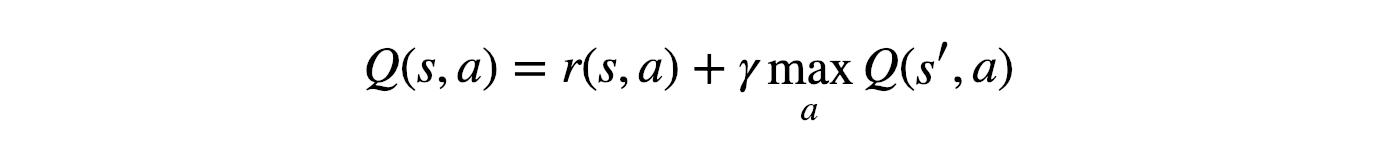

# Update of Q-Learning 
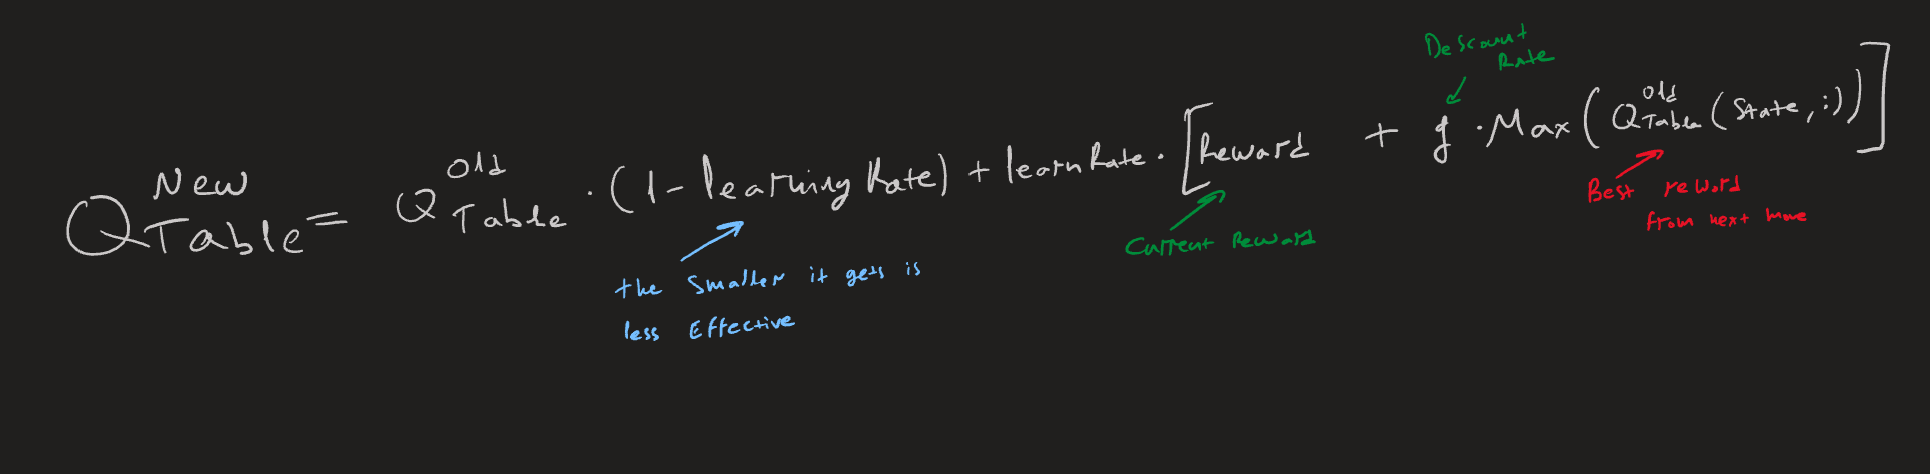

In [ ]:
def updateQLearning (q_table,learning_rate,reward,discount_rate,state,new_state):
  # ------------------------ Update Q-table for Q(s,a)----------------------
  q_table[state,action] = q_table[state,action] + learning_rate*(reward + discount_rate*np.max(q_table[new_state,:]) - q_table[state,action])
  # Its simple Q_Learning update is based on the fact that you need to adjust your reality based on the new informaton
  # you are using the curent information that you have plus the learning rage with the new redard
  # There you are using teh reward taht you just got plus the next possible reward discountet by the gama value minues the reward minues the value that you are standing right now 
  # ------------------------ Update Q-table for Q(s,a)----------------------

  return q_table

In [ ]:
def actionRandomOrBestMove (exploration_rate,q_table,env,state):  

  exploration_rate_threshold = random.uniform(0,1) # We find a random number from zero to 1 

  # print(exploration_rate_threshold,exploration_rate)
  # ------------------------ Take Action Random or Best move ----------------
  if exploration_rate_threshold>exploration_rate: # We dont explore and we take the maximum value 
      action = np.argmax(q_table[state,:]) # what we start here is that for the state that we are we look at all the possible actions and take the best possible action available
  else: # we explore and we take a random value # at the start we always explore
      action = env.action_space.sample() # This number will be random from 0 to 3 which is the 4 possible actions 
      
  return (action)
  # ------------------------ Take Action Random or Best move ----------------

# Exploration Decay
This is the Exploration Decay function and helps us to make an exponential curve on the probability of exploring or just using the best possible action for a given state. 

This is vital because if we don't explore we are not able to find the final position and the right results in order to propagate the results everywhere else

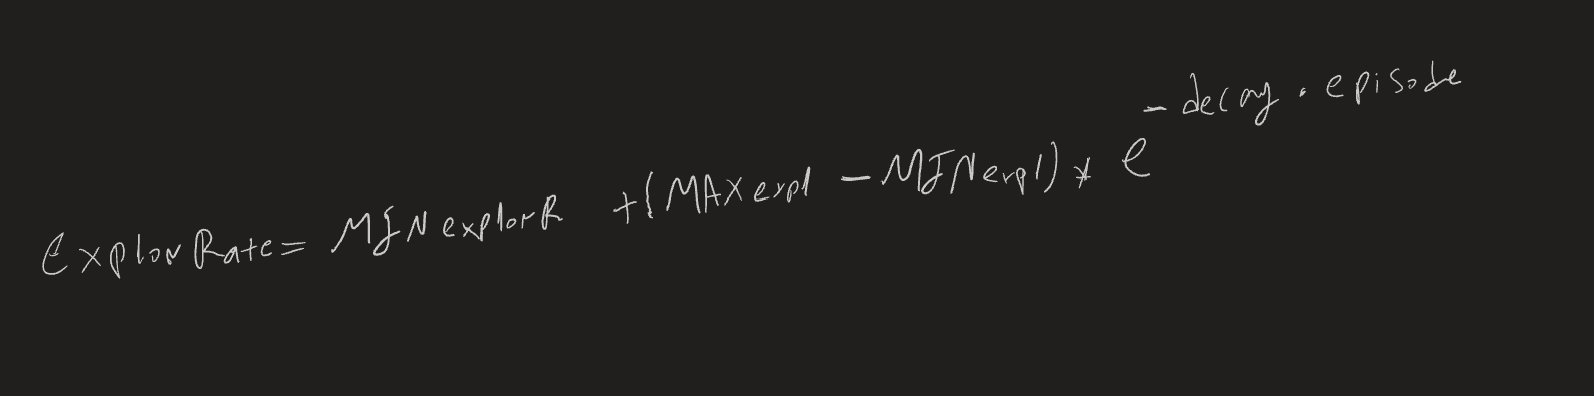

In [ ]:
def explorationDecay (min_exploration_rate,max_exploration_rate,env,exploration_decay_rate,episode): 

  # ---------------- Exploration rate decay 2 -----------------------
  exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate)*np.exp(-exploration_decay_rate*episode)
  # ---------------- Exploration rate decay 2 -----------------------

  return exploration_rate

# Main steps that every Reinforcment Learning algorithm need to have 


1.   Reset the environment
2.   Start a session for an episode
3.   Find the next action based on the state
*   You can just go to a random position for exploration using the exploration number 
*   Or you can caluclate the best posibly positoin to go based on the Q-Learning table that we created that has the reward for each of the sates


4.   Actuiall implement the action and get the reward, new_state
5.   Update the Q-Learning Table
6.   When you are done with one episode change the exploration rate



# The secrete for this algorithm to Work

After I finished implementing the system for 4x4 Lakes I decided to go to the more difficult level and try with 8x8 lakes, however, it was impossible to converge and Q array had zero everywhere.

The reason is simple, the reward is extremely spare, and the possibility of going from the start to the finish randomly is really small. So the possibility of getting a positive reward and changing the Q-table is really small.

My idea was to introduce negative rewards especially in the place that the game stops and we lose. The negative reward that I decided to use is -0.5 and worked fairly well for both table q learning and network q learning. But of course, there is room there to improve the hyperparameters

In [ ]:
rewardEveryEpisode = []

testEvery = 80
countTestEvery = 0
correctAnswers = [0]
falseAnswers = [0]
correctAndFalseAnsweresCount = 0

for episode in range(count_episodes):
    state = env.reset()
    
    done = False
    reward_curent_episode = 0 # It always start from 0 and we need to calculte it in the next loop

    for step in range(stepEpisode): # Try to finish the episode but even if it cant you will stop the loop after stepEpisode 
      # exploration_rate_threshold = random.uniform(0,1) # We find a random number from zero to 1 
        
      action = actionRandomOrBestMove (explor_rate,Q_LearningT,env,state)
      # # ------------------------ Take Action Random or Best move ----------------
      # if exploration_rate_threshold>exploration_rate: # We dont explore and we take the maximum value 
      #     action = np.argmax(q_table[state,:]) # what we start here is that for the state that we are we look at all the possible actions and take the best possible action available
      # else: # we explore and we take a random value # at the start we always explore
      #     action = env.action_space.sample() # This number will be random from 0 to 3 which is the 4 possible actions 
          
      # # ------------------------ Take Action Random or Best move ----------------

      new_state,reward,done,info = env.step(action)

      if (done==True and reward==0):
          reward = -0.5
      
      Q_LearningT = updateQLearning(Q_LearningT,lr,reward,gamma,state,new_state)

          
      state = new_state
      
      reward_curent_episode += reward
      
      
      if (done == True):
          # ----------------------- Persentage of Correct answeres ----------------------- 
          if (countTestEvery<testEvery):
              countTestEvery += 1
              if (reward==1):
                  correctAnswers[correctAndFalseAnsweresCount] += 1
              elif (reward==-0.5):
                  falseAnswers[correctAndFalseAnsweresCount] += 1
          else:
              countTestEvery = 0
              correctAndFalseAnsweresCount += 1
              if (reward==1):
                  correctAnswers.append(1)
                  falseAnswers.append(0)
              elif (reward==-0.5):
                  correctAnswers.append(0)
                  falseAnswers.append(1)
                  
          # ----------------------- Persentage of Correct answeres -----------------------
          break

    explor_rate = explorationDecay(explor_rateMIN,explor_rateMAX,env,explorDecayRate,episode)
    # # ---------------- Exploration rate decay 2 -----------------------
    # exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate)*np.exp(-exploration_decay_rate*episode)
    # # ---------------- Exploration rate decay 2 -----------------------
    
    rewardEveryEpisode.append(reward_curent_episode)

    print("We are at =",episode,count_episodes, "reward = ",reward_curent_episode)

        


Streaming output truncated to the last 5000 lines.
We are at = 0 5000 reward =  -0.5
We are at = 1 5000 reward =  -0.5
We are at = 2 5000 reward =  -0.5
We are at = 3 5000 reward =  -0.5
We are at = 4 5000 reward =  -0.5
We are at = 5 5000 reward =  -0.5
We are at = 6 5000 reward =  -0.5
We are at = 7 5000 reward =  -0.5
We are at = 8 5000 reward =  -0.5
We are at = 9 5000 reward =  -0.5
We are at = 10 5000 reward =  -0.5
We are at = 11 5000 reward =  -0.5
We are at = 12 5000 reward =  -0.5
We are at = 13 5000 reward =  -0.5
We are at = 14 5000 reward =  -0.5
We are at = 15 5000 reward =  -0.5
We are at = 16 5000 reward =  -0.5
We are at = 17 5000 reward =  -0.5
We are at = 18 5000 reward =  -0.5
We are at = 19 5000 reward =  -0.5
We are at = 20 5000 reward =  -0.5
We are at = 21 5000 reward =  -0.5
We are at = 22 5000 reward =  -0.5
We are at = 23 5000 reward =  1.0
We are at = 24 5000 reward =  -0.5
We are at = 25 5000 reward =  -0.5
We are at = 26 5000 reward =  -0.5
We are at = 27 

In [ ]:
print("q_table value of each state and action combination = \n",Q_LearningT)

q_table value of each state and action combination = 
 [[-2.28566130e-03 -1.49618129e-03 -2.06735119e-03 -6.14480176e-03]
 [-1.41067679e-03 -1.43880859e-03 -1.72902400e-02 -5.99231657e-04]
 [-1.87893894e-03 -1.39779297e-03  1.13943844e-03 -3.29852908e-02]
 [-2.44056514e-03 -9.99957772e-02  1.60615838e-05  2.22961177e-03]
 [ 1.27348844e-03 -9.03529436e-03  2.06388713e-03  7.00563160e-03]
 [ 6.98542415e-03  1.20924009e-02 -1.27304313e-02  7.24709763e-03]
 [ 1.76409636e-02  1.63034949e-02  2.30701944e-02  1.57140459e-02]
 [ 2.37406853e-02  2.23487951e-02  3.29168769e-02  2.16412933e-02]
 [-2.77013363e-03 -3.76722650e-03 -4.23856312e-03 -4.65853077e-03]
 [-7.33539422e-03 -5.44394235e-03 -4.00409927e-03 -2.18558383e-03]
 [-1.30124721e-02 -4.25792613e-03 -1.34799108e-02 -5.01327348e-03]
 [-2.68996191e-01 -3.20447078e-01 -1.41556344e-01 -7.40369491e-03]
 [-1.51457389e-02 -3.58660021e-02 -3.84849635e-02 -5.26411664e-02]
 [ 2.12860288e-03  1.39329061e-03  5.18086456e-03 -4.62353093e-03]
 [ 1.55

# Persentage of Correct answeres

In [ ]:
for i in range(len(correctAnswers)):
    print("Phase ",i,"  Persentage Correct to Wrong Results = ",round((correctAnswers[i]/(correctAnswers[i]+falseAnswers[i]))*100)," number Correct = ",correctAnswers[i]," Number False = ",falseAnswers[i])


Phase  0   Persentage Correct to Wrong Results =  1  number Correct =  1  Number False =  79
Phase  1   Persentage Correct to Wrong Results =  0  number Correct =  0  Number False =  81
Phase  2   Persentage Correct to Wrong Results =  0  number Correct =  0  Number False =  81
Phase  3   Persentage Correct to Wrong Results =  12  number Correct =  10  Number False =  71
Phase  4   Persentage Correct to Wrong Results =  14  number Correct =  11  Number False =  70
Phase  5   Persentage Correct to Wrong Results =  33  number Correct =  27  Number False =  54
Phase  6   Persentage Correct to Wrong Results =  26  number Correct =  21  Number False =  60
Phase  7   Persentage Correct to Wrong Results =  28  number Correct =  23  Number False =  58
Phase  8   Persentage Correct to Wrong Results =  36  number Correct =  29  Number False =  52
Phase  9   Persentage Correct to Wrong Results =  38  number Correct =  31  Number False =  50
Phase  10   Persentage Correct to Wrong Results =  33  n

# Persentage of average reward per thousand

In [ ]:
averageRewardTh = np.zeros((10,1))
for i in range(len(rewardEveryEpisode)):
    averageRewardTh[int(i/1000)] = averageRewardTh[int(i/1000)] + rewardEveryEpisode[i]
    
print(averageRewardTh/1000*100)

[[-20.75]
 [  4.45]
 [ 11.8 ]
 [  0.55]
 [  2.8 ]
 [  0.  ]
 [  0.  ]
 [  0.  ]
 [  0.  ]
 [  0.  ]]


In [ ]:
numberGames = 50
numberCorrect = 0
for episode in range(numberGames):
    state = env.reset()
    done = False
    
    for step in range(stepEpisode):
        
        action = np.argmax(Q_LearningT[state,:]) # Find the best possible choice of position
        new_state,reward,done,info = env.step(action) # Take action
        
        if done: # If we are done ( foudn the goal or a fail)
            if reward ==1:
                numberCorrect = numberCorrect + 1
            break
        
        state = new_state
        


print("Persentage of win games = ",(numberCorrect/numberGames)*100,"(Win Games, Lose Games) = ",numberCorrect,numberGames - numberCorrect)
                

Persentage of win games =  44.0 (Win Games, Lose Games) =  22 28


# Play the Game

In [ ]:
for episode in range(3):
    state = env.reset()
    done = False
    print("***Episode ",episode+1,"***")
    time.sleep(0.2)
    
    for step in range(stepEpisode):
        clear_output(wait=True)
        env.render()
        time.sleep(0.04)
        
        action = np.argmax(Q_LearningT[state,:])
        new_state,reward,done,info = env.step(action)
        
        if done:
            clear_output(wait=True)
            env.render()
            if reward ==1:
                print("*** Reached the Goal!***")
                time.sleep(1.3)
            else:
                print("*** Fell through a hole!***")
                time.sleep(1.3)
            clear_output(wait=True)
            break
        
        state = new_state
        
env.close()
                

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
*** Reached the Goal!***
